In [1]:
%matplotlib inline

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
blobs_data, blobs_clusters = make_blobs(n_samples = 300)

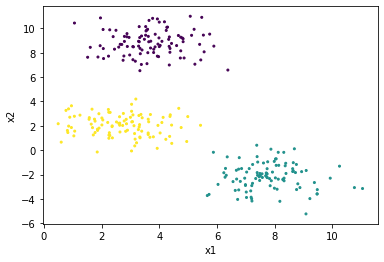

In [4]:
plt.scatter(blobs_data[:, 0], blobs_data[:, 1], s = 4, c = blobs_clusters)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [5]:
k_means = KMeans(n_clusters = 3)

In [6]:
k_means.fit(blobs_data)

KMeans(n_clusters=3)

In [7]:
predictions = k_means.predict(blobs_data)

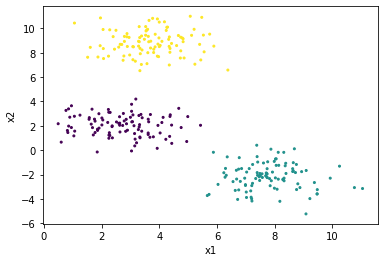

In [8]:
plt.scatter(blobs_data[:, 0], blobs_data[:, 1], s = 4, c = predictions)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [17]:
blobs_data, blobs_clusters = make_blobs(n_samples = 300)
def visualize_clustering(blobs_data, blobs_centers, k = 3):
    k_means = KMeans(n_clusters = k)
    predictions = k_means.fit_predict(blobs_data)
    
    plt.scatter(blobs_data[:, 0], blobs_data[:, 1], s = 4, c = predictions)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.gca().set_aspect('equal')
    
    plt.show()

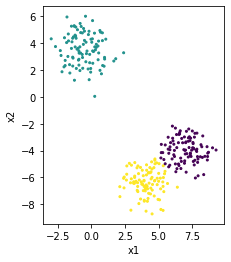

In [18]:
visualize_clustering(blobs_data, blobs_clusters)

In [70]:
blobs_data, blobs_clusters = make_blobs(n_samples = 300)

def prepare_plot():
    plt.gca().set_aspect('equal')
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    plt.show()
    
def visualize_clustering(data, centers, k = 3, init = 'k-means++'):
    k_means = KMeans(n_clusters = k, init = init)
    k_means.fit_predict(data)
    
    plt.title('Target')
    plt.scatter(data[:, 0], data[:, 1], s = 4, c = centers)
    prepare_plot()
    
    
    plt.title('Predictions')
    plt.scatter(data[:, 0], data[:, 1], s = 4, c = predictions)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c = 'r')
    prepare_plot()
    
    return k_means

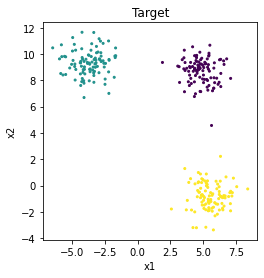

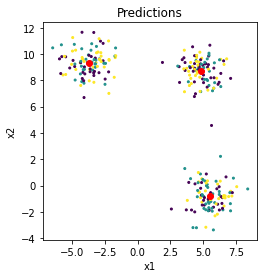

In [58]:
visualize_clustering(blobs_data, blobs_clusters)

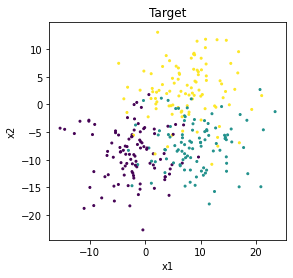

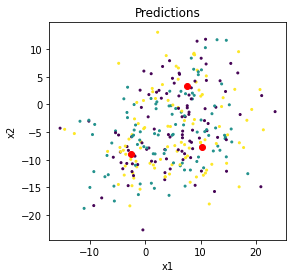

In [59]:
blobs_data, blobs_clusters = make_blobs(n_samples = 300, cluster_std = 5)
visualize_clustering(blobs_data, blobs_clusters)

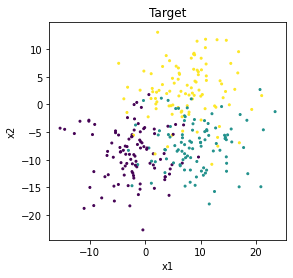

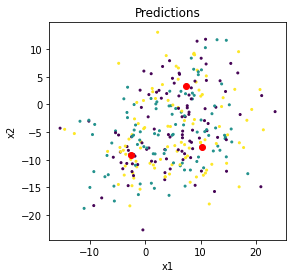

In [60]:
visualize_clustering(blobs_data, blobs_clusters)

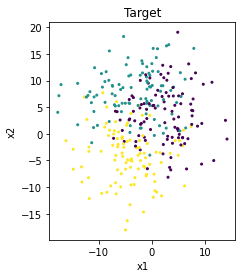

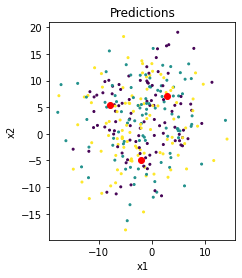

In [61]:
blobs_data, blobs_clusters = make_blobs(n_samples = 300, cluster_std = 5)
visualize_clustering(blobs_data, blobs_clusters)

In [62]:
(blobs_clusters == predictions).sum() / len(blobs_clusters)

0.31

In [63]:
k_means.cluster_centers_

array([[-0.27401293, -0.69207766],
       [-0.46235037,  0.58334099],
       [ 0.7363633 ,  0.10873667]])

In [64]:
circles_data, circles_clusters = make_circles(n_samples = 300, factor = 0.1, noise = 0.1)

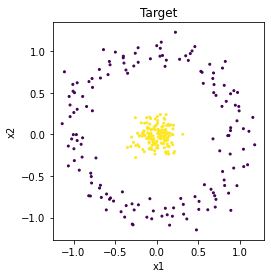

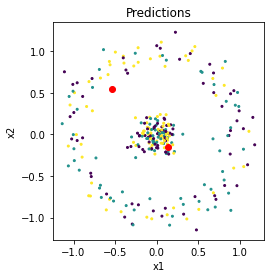

In [65]:
visualize_clustering(circles_data, circles_clusters, k = 2)

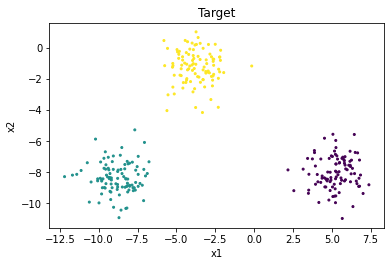

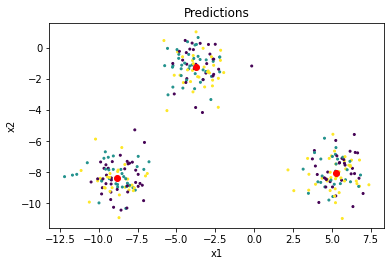

In [66]:
blobs_data, blobs_clusters = make_blobs(n_samples = 300)
visualize_clustering(blobs_data, blobs_clusters, k = 3, init = 'random')

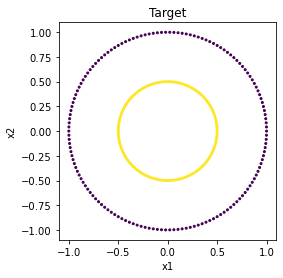

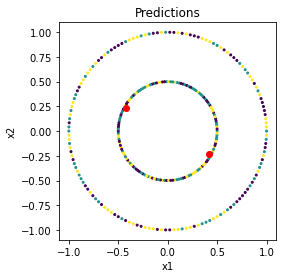

In [67]:
circles_data, circles_clusters = make_circles(n_samples = 300, factor = 0.5)
visualize_clustering(circles_data, circles_clusters, k = 2, init = 'random')

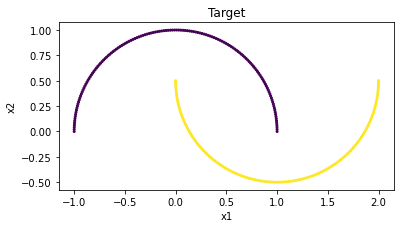

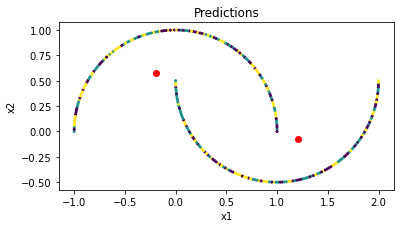

In [68]:
moons_data, moons_clusters = make_moons(n_samples = 300)
visualize_clustering(moons_data, moons_clusters, k = 2)

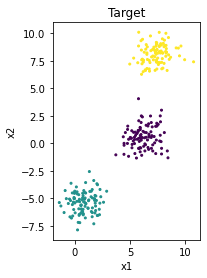

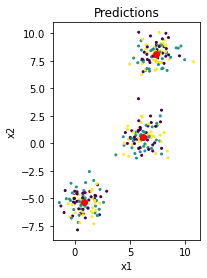

In [71]:
blobs_data, blobs_clusters = make_blobs(n_samples = 300)
k_means = visualize_clustering(blobs_data, blobs_clusters, k = 3)

In [72]:
k_means.inertia_

550.0190365697056

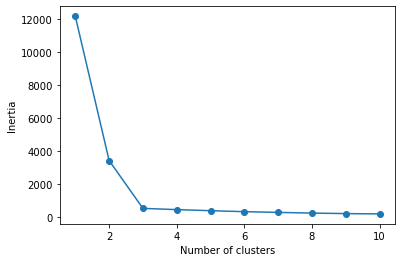

In [75]:
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(blobs_data)
    inertias.append(km.inertia_)
plt.plot(range(1, 11), inertias, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [80]:
aggl = AgglomerativeClustering(n_clusters = 3)
aggl_predictions = aggl.fit_predict(blobs_data)

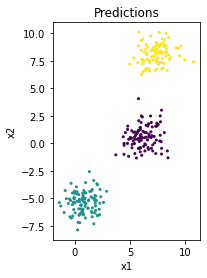

In [81]:
plt.title('Predictions')
plt.scatter(blobs_data[:, 0], blobs_data[:, 1], s = 4, c = aggl_predictions)
#plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c = 'r')
prepare_plot()

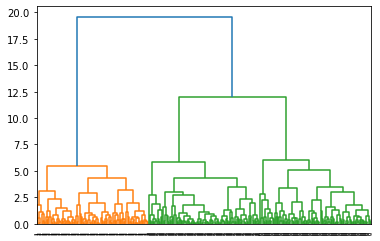

In [85]:
row_clusters = linkage(blobs_data, method = 'complete', metric = 'euclidean')
dendrogram(row_clusters, labels = blobs_clusters)
plt.show()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [43.75, 43.75, 82.5, 82.5],
  [12.5, 12.5, 63.125, 63.125]],
 'dcoord': [[0.0, 4.285416139114689, 4.285416139114689, 0.0],
  [0.0, 5.415227050778076, 5.415227050778076, 4.285416139114689],
  [0.0, 3.446581894097256, 3.446581894097256, 0.0],
  [0.0, 4.338599138803793, 4.338599138803793, 3.446581894097256],
  [0.0, 5.806646985615837, 5.806646985615837, 4.338599138803793],
  [0.0, 5.051693536693199, 5.051693536693199, 0.0],
  [0.0, 6.007436738734247, 6.007436738734247, 5.051693536693199],
  [5.806646985615837, 11.95731224633606, 11.95731224633606, 6.007436738734247],
  [5.415227050778076,
   19.604966157294356,
   19.604966157294356,
   11.95731224633606]],
 'ivl': ['(35)',
  '(33)',
  '(32)',
  '(13)',
  '(51)',
  '(13)',
  '(23)',
  '(13)',
  '(30)',
  '(57)'],
 'leaves': [586, 583, 5

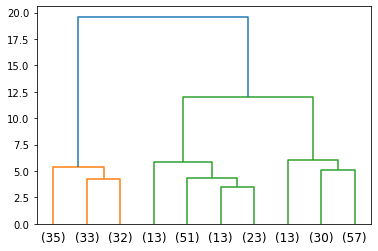

In [86]:
dendrogram(row_clusters, labels = blobs_clusters, truncate_mode = 'lastp', p  = 10)